# **Water Potability**
Source Dataset: [Kaggle](https://www.kaggle.com/datasets/adityakadiwal/water-potability/data)

# **Context**
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

# **Content**
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

### **1. pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

### **2. Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

### **3. Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

### **4. Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

### **5. Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

### **6. Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

### **7. Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

### **8. Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

### **9. Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

### **10. Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


---



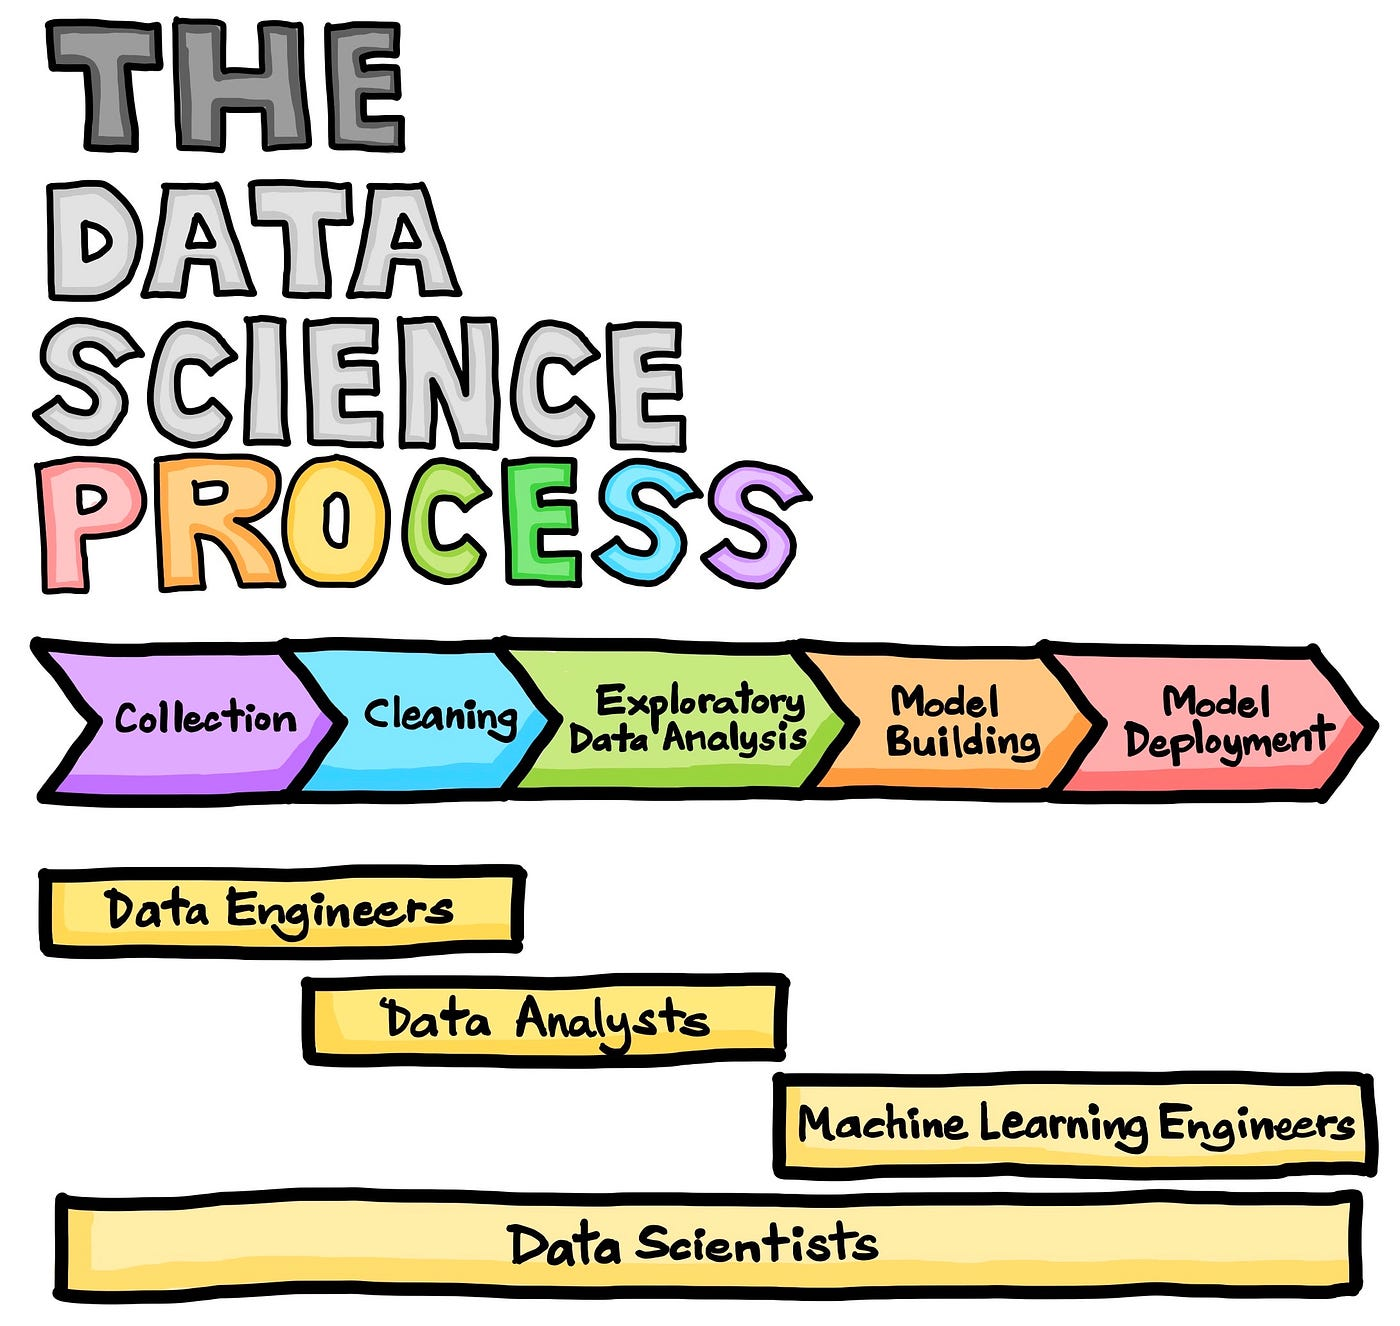

# **Decision Tree**

## **Data Collection**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/water_potability.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv(dataset_path)

## **Data Cleaning**

In [ ]:
df.fillna(df.mean(), inplace=True) #karena data <10k lebih bagus buat fill data daripada drop. fill data pakai rata-rata nilai.

## **EDA (Exploration Data Analysis)**

## Pre Cleaning Dataset

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.count()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64

In [ ]:
df.shape # Rows x Colomn

(3276, 10)

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Post Cleaning

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,333.775777,327.459760,16.140368,78.698446,2.309149,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.count()

ph                 3276
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            3276
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3276
Turbidity          3276
Potability         3276
dtype: int64

In [ ]:
df.shape #ukuran baris kolom tidak berubah karena kita fill bukan drop.

(3276, 10)

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## **Data visualization**

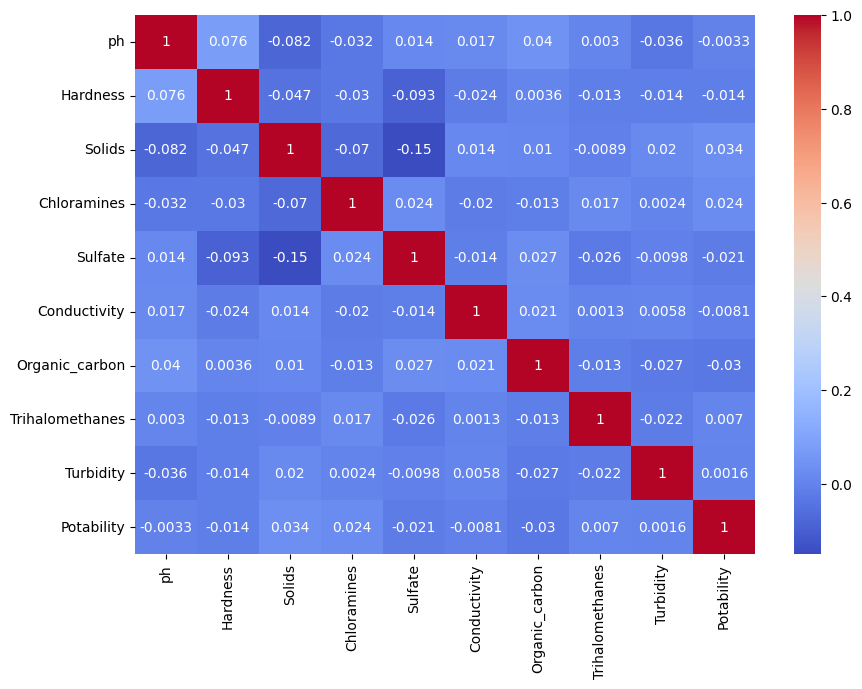

In [ ]:
plt.figure(figsize=(10, 7)) #ukuran gambar 10x7
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") #tampilin korelasi antar data
plt.show()

In [ ]:
df['Potability'] = df['Potability'].astype('category')

In [ ]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

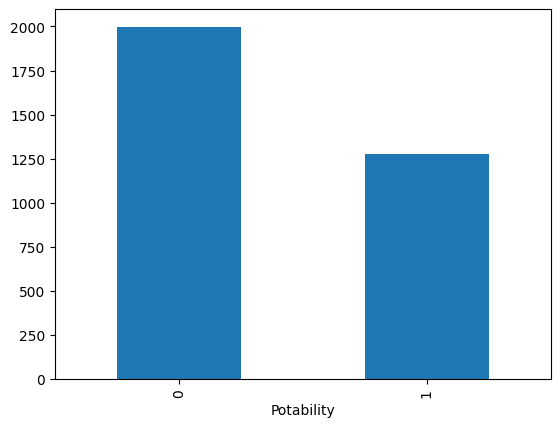

In [ ]:
potability_counts = df['Potability'].value_counts()
potability_counts.plot(kind='bar', x='Potability', y='value_counts')
plt.show()

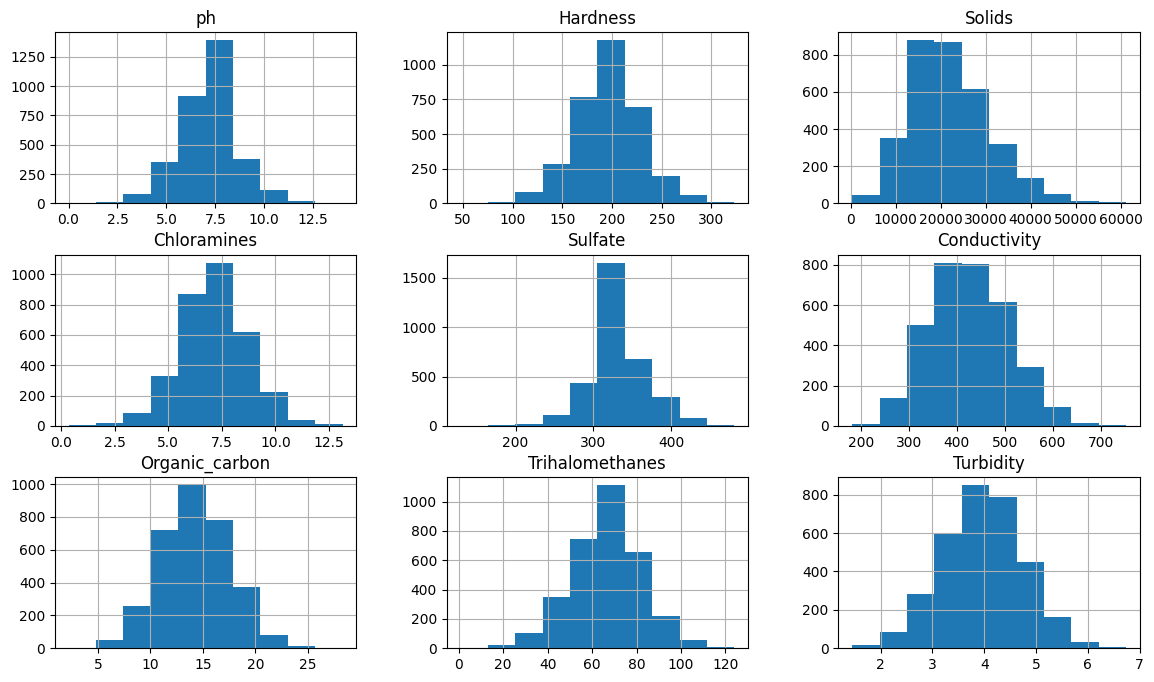

In [ ]:
df.hist(figsize=(14,8))
plt.show()

## **Model Building**

### **Split Train Test**

In [ ]:
X = df.drop('Potability', axis=1) #Input Variabel / Independent
y = df['Potability'] #Target Variabel / Dependent

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True) #Melatih train dan test pada data dengan test_size 0.2 / untuk test 20% dari banyaknya jumlah data.

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', splitter='best',
                            min_samples_split=10)

In [ ]:
dt.fit(X_train,y_train) #Training data

DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

In [ ]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2947,7.080795,183.521107,20461.252710,7.333212,333.119476,356.369022,20.179029,67.019903,4.886634
2782,6.643159,188.913541,32873.820022,6.791509,333.848842,336.561501,14.706810,67.844849,4.562198
1644,7.846058,224.058877,23264.109968,5.922367,300.402620,387.971336,13.406737,43.075186,2.487969
70,7.160467,183.089310,6743.346066,3.803036,277.599099,428.036344,9.799625,90.035374,3.884891
2045,6.615350,179.240661,26392.863612,9.309160,333.775777,496.363562,12.786595,78.262369,4.453443
...,...,...,...,...,...,...,...,...,...
208,10.026159,224.266358,14962.177833,7.428313,336.972950,517.512842,18.858519,65.363452,4.182278
1578,6.865569,231.445054,22585.788809,5.676387,333.775777,496.603425,16.154964,91.461709,4.916218
565,7.459145,217.700130,19436.503542,4.639116,352.424439,494.094339,14.460295,57.196188,3.841052
313,5.862641,185.065220,44069.272158,4.382721,412.690111,331.570139,15.306079,59.605812,5.507421


In [ ]:
y_test[313] #cek index 313

1

In [ ]:
predictionTest = dt.predict(X_test)
predictionTrain = dt.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(predictionTest, y_test)*100 #test data prediksi *100 buat jadiin persen

57.92682926829268

In [ ]:
confusion_matrix(predictionTest,y_test) #Cek TP,FP,TN,FN

array([[261, 125],
       [151, 119]])

In [ ]:
print(f'Training Score sebelum tuning model: {accuracy_score(predictionTrain, y_train) * 100:.2f}%') #predictionTrain(X_train) memprediksi y_train
print(f'Test Score sebelum tuning model: {accuracy_score(predictionTest, y_test) * 100:.2f}%') #predictionTest(X_test) memprediksi y_test

Training Score sebelum tuning model: 92.71%
Test Score sebelum tuning model: 57.93%


## **Data Pre Tuning**

## **Tuning Model**

### **Uji Coba 1**

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier()

# Tentukan daftar nilai yang akan dicoba untuk masing-masing hyperparameter
param_grid = {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"],
    'min_samples_split': [2, 4, 6, 10, 15, 20]  # Testing 2, 5, 10, 20
}

# Inisialisasi RepeatedStratifiedKFold untuk cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=cv)

# Split data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model dengan data training
grid_search.fit(X_train, y_train)

# Menampilkan kombinasi hyperparameter terbaik
print("Kombinasi Hyperparameter Terbaik:", grid_search.best_params_)

# Evaluasi performa model pada data testing
best_dt = grid_search.best_estimator_
test_accuracy = best_dt.score(X_test, y_test)
print(f'Test Score setelah tuning model pakai min_sample_split tersebut: {test_accuracy * 100:.2f}%')

Kombinasi Hyperparameter Terbaik: {'criterion': 'gini', 'min_samples_split': 20, 'splitter': 'random'}
Test Score setelah tuning model pakai min_sample_split tersebut: 56.55%


### **Uji Coba 2**

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier()

# Tentukan daftar nilai yang akan dicoba untuk masing-masing hyperparameter
param_grid = {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 15, 20],
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

# Inisialisasi RepeatedStratifiedKFold untuk cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=cv, scoring='roc_auc')

# Split data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model dengan data training
grid_search.fit(X_train, y_train)

# Menampilkan kombinasi hyperparameter terbaik
print("Kombinasi Hyperparameter Terbaik:", grid_search.best_params_)

# Evaluasi performa model pada data testing
best_dt = grid_search.best_estimator_
test_accuracy = best_dt.score(X_test, y_test)
print(f'Test Score setelah tuning model pakai min_sample_split tersebut: {test_accuracy * 100:.2f}%')

y_pred = best_dt.predict(X_test)
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Kombinasi Hyperparameter Terbaik: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 20, 'splitter': 'best'}
Test Score setelah tuning model pakai min_sample_split tersebut: 62.96%
ROC AUC Score: 0.5805944612446284
Accuracy Score: 0.6295731707317073


### **Uji Coba 3**

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier()

# Tentukan daftar nilai yang akan dicoba untuk masing-masing hyperparameter
param_grid = {
    'criterion': ["gini", "entropy"],
    'splitter': ["best", "random"],
    'min_samples_split': range(1, 10)  # Testing nilai 1 hingga 20
}

# Inisialisasi RepeatedStratifiedKFold untuk cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=cv)

# Split data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #coba di test_size 30%

# Melatih model dengan data training
grid_search.fit(X_train, y_train)

# Menampilkan kombinasi hyperparameter terbaik
print("Kombinasi Hyperparameter Terbaik:", grid_search.best_params_)

# Evaluasi performa model pada data testing
best_dt = grid_search.best_estimator_
test_accuracy = best_dt.score(X_test, y_test)
print(f'Test Score setelah tuning model: {test_accuracy * 100:.2f}%')


Kombinasi Hyperparameter Terbaik: {'criterion': 'gini', 'min_samples_split': 9, 'splitter': 'best'}
Test Score setelah tuning model: 57.93%


# **Random Forest**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
df = pd.read_csv("/content/normalized_data.csv")

In [ ]:
import numpy as np
from sklearn.model_selection import, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier


# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=50)  # Sesuaikan n_estimators sesuai kebutuhan

# Melatih Model
rf_model.fit(X_train, y_train)

# Melakukan Prediksi pada Data Uji
y_pred = rf_model.predict(X_test)

# Perhitungan Akurasi Training
accuracy_train = accuracy_score(y_train, rf_model.predict(X_train))

# Perhitungan Metrik Performa pada Data Uji
predictionTest = rf_model.predict(X_test)
accuracy = accuracy_score(predictionTest, y_pred)
precision = precision_score(predictionTest, y_pred)
recall = recall_score(predictionTest, y_pred)

# Validasi Silang
cv = KFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

# Menampilkan Hasil
print("Accuracy Training:", accuracy_train)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy scores (cross-validation):", accuracy_scores)
print("Accuracy rata-rata (cross-validation):", np.mean(accuracy_scores))


Accuracy Training: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Accuracy scores (cross-validation): [0.63180828 0.63398693 0.61220044 0.63973799 0.65720524]
Accuracy rata-rata (cross-validation): 0.6349877748285147


In [ ]:
print(f'Test Score sebelum tuning model: {accuracy_score(y_pred, y_test) * 100:.2f}%')

Test Score sebelum tuning model: 67.14%


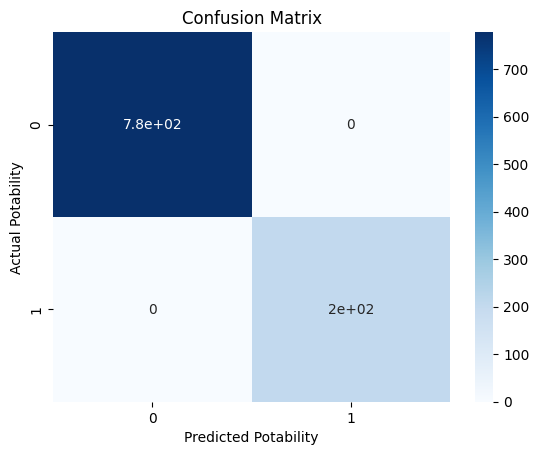

In [ ]:
confusion_matrix = confusion_matrix(predictionTest, y_pred)

# Create a confusion matrix heatmap with labels using Seaborn
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Potability')
plt.ylabel('Actual Potability')
plt.title('Confusion Matrix')
plt.show()

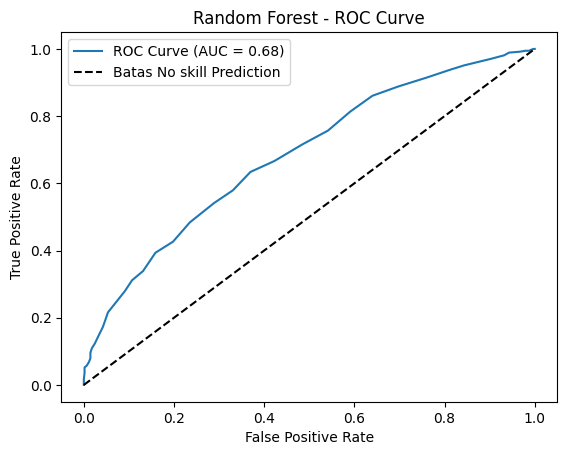

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--', label='Batas No skill Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend()
plt.show()

# **Uji Coba Model**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import joblib

# Memuat model decision tree
dt_model = joblib.load('dt_waterQuality.pkl')

# Memuat model random forest
rf_model = joblib.load('rf_waterQuality.pkl')

# Fungsi untuk melakukan prediksi menggunakan kedua model
def combined_predictions(X):
    dt_predictions = dt_model.predict(X)
    rf_predictions = rf_model.predict(X)
    combined_predictions = []  # List untuk menyimpan prediksi gabungan
    for dt_pred, rf_pred in zip(dt_predictions, rf_predictions):
        # Kombinasikan prediksi dari kedua model, misalnya dengan mengambil mayoritas suara
        combined_prediction = dt_pred if dt_pred == rf_pred else 0  # Misalnya, gunakan prediksi dari model decision tree jika keduanya berbeda
        combined_predictions.append(combined_prediction)
    return combined_predictions

# Simpan model gabungan
joblib.dump(combined_predictions, 'waterQuality.pkl')


['waterQuality.pkl']

In [ ]:
import pickle

with open('dt_waterQuality.pkl', 'rb') as file:
    dt_model = pickle.load(file)

In [ ]:
import pickle

with open('rf_waterQuality.pkl', 'rb') as file:
    rf_model = pickle.load(file)


In [ ]:
import pickle

with open('waterQuality.pkl', 'rb') as file:
    model = pickle.load(file)


## **Cek Validasi Model**

### **Decision Tree**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#index
pred = dt_model.predict([[7.2, 220, 310, 1.1, 270, 520, 13, 62, 2.8]])[0]
pred

0

### **Random Forest**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#index 208
pred = rf_model.predict([[7.2, 220, 310, 1.1, 270, 520, 13, 62, 2.8]])[0]
pred

0

### **Model baru gabungan**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#index 208
pred = [[7.2, 220, 310, 1.1, 270, 520, 13, 62, 2.8]]
predictions = model(pred)

print(predictions)

[0]


In [1]:
import warnings
warnings.filterwarnings("ignore")

import joblib

# Memuat model gabungan
model = joblib.load('waterQuality.pkl')

# Meminta pengguna untuk memasukkan data baru
ph = float(input("Masukkan nilai pH: "))
hardness = float(input("Masukkan nilai Hardness: "))
solids = float(input("Masukkan nilai Solids: "))
chloramines = float(input("Masukkan nilai Chloramines: "))
sulfate = float(input("Masukkan nilai Sulfate: "))
conductivity = float(input("Masukkan nilai Conductivity: "))
organic_carbon = float(input("Masukkan nilai Organic_carbon: "))
trihalomethanes = float(input("Masukkan nilai Trihalomethanes: "))
turbidity = float(input("Masukkan nilai Turbidity: "))

# Masukkan data baru yang ingin Anda prediksi dalam bentuk matriks 2D
X_new = [[ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity]]

# Lakukan prediksi menggunakan model gabungan
predictions = model(X_new)

# Ubah hasil prediksi menjadi informasi yang lebih jelas
if predictions[0] == 0:
    result = "Air tidak layak untuk diminum"
else:
    result = "Air layak untuk diminum"

print('Dari data tersebut,', result)


ModuleNotFoundError: No module named 'joblib'

## **Gradio**

In [12]:
pip install gradio -q

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\FirzaIrvan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [10]:
pip install joblib -q

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\FirzaIrvan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:
# Gradio Interface Version

import joblib
import gradio as gr

model = joblib.load('waterQuality.pkl')

def predict_quality(ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity):
    # Validasi input
    try:
        ph = float(ph)
        hardness = float(hardness)
        solids = float(solids)
        chloramines = float(chloramines)
        sulfate = float(sulfate)
        conductivity = float(conductivity)
        organic_carbon = float(organic_carbon)
        trihalomethanes = float(trihalomethanes)
        turbidity = float(turbidity)

        # Masukkan data baru yang ingin Anda prediksi dalam bentuk matriks 2D
        X_new = [[ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity]]

        # Lakukan prediksi menggunakan model gabungan
        predictions = model(X_new)

        # Ubah hasil prediksi menjadi informasi yang lebih jelas
        if predictions[0] == 0:
            return "Air tidak layak untuk diminum"
        else:
            return "Air layak untuk diminum"
    except ValueError:
        return "Error: Invalid input values. Please enter numeric values for all fields."

# Membuat antarmuka Gradio
iface = gr.Interface(
    predict_quality,
    [
        gr.Number(label="Masukkan nilai pH"),
        gr.Number(label="Masukkan nilai Hardness"),
        gr.Number(label="Masukkan nilai Solids"),
        gr.Number(label="Masukkan nilai Chloramines"),
        gr.Number(label="Masukkan nilai Sulfate"),
        gr.Number(label="Masukkan nilai Conductivity"),
        gr.Number(label="Masukkan nilai Organic_carbon"),
        gr.Number(label="Masukkan nilai Trihalomethanes"),
        gr.Number(label="Masukkan nilai Turbidity")
    ],
    "text",
    title="Prediksi Kualitas Air"
)

# Menjalankan antarmuka Gradio
iface.launch(debug=True)

AttributeError: Can't get attribute 'combined_predictions' on <module '__main__'>